In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

W poniższym przykładzie posłużymy się zestawem danych reklamowych, obejmującym sprzedaż produktów i ich budżet reklamowy w trzech różnych mediach telewizyjnych, radiu, gazetach.

In [2]:
df_adv = pd.read_csv('Advertising.txt', index_col=0)
X = df_adv[['TV', 'radio', 'newspaper']]
y = df_adv['sales']
df_adv.head(100)


,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
96,163.3,31.6,52.9,16.9
97,197.6,3.5,5.9,11.7
98,184.9,21.0,22.0,15.5
99,289.7,42.3,51.2,25.4


In [3]:
## fit a OLS model with intercept on TV and Radio
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.982    
Dependent Variable:     sales            AIC:                         853.0824 
Date:                   2022-02-27 14:30 BIC:                         862.9773 
No. Observations:       200              Log-Likelihood:              -423.54  
Df Model:               3                F-statistic:                 3566.    
Df Residuals:           197              Prob (F-statistic):          2.43e-171
R-squared (uncentered): 0.982            Scale:                       4.1068   
------------------------------------------------------------------------------------
               Coef.       Std.Err.         t         P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
TV             0.0538        0.0013      40.5067      0.0000      0.0512      0.0564
radio          0.2222        0.0094      23.

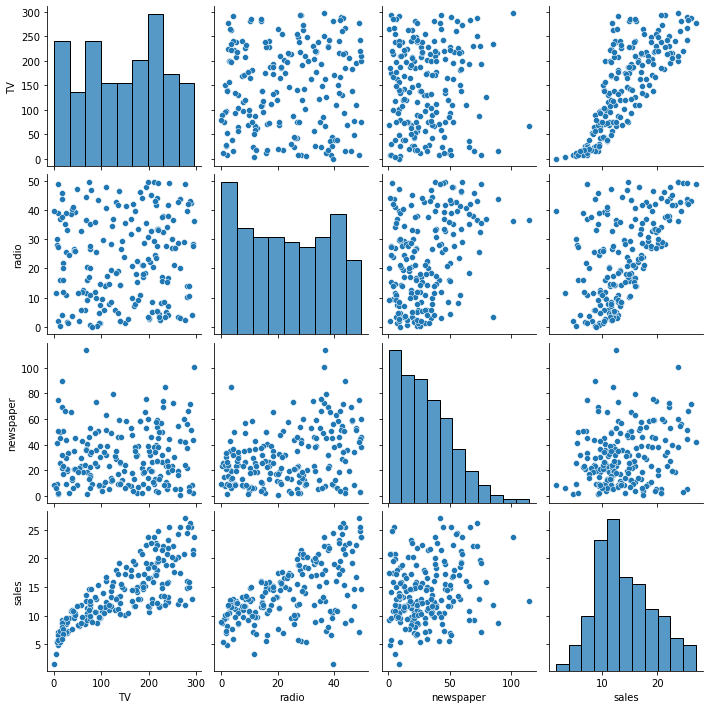

In [4]:
import seaborn as sns
df=pd.DataFrame(df_adv)
sns.pairplot(df)#, kind="reg"
plt.show()

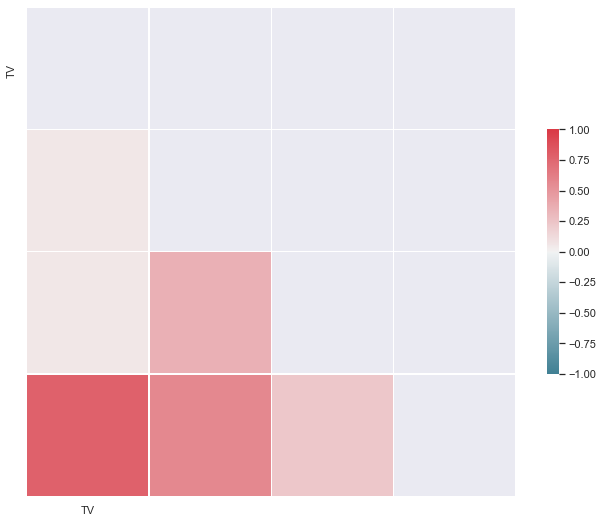

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [5]:
sns.set(style="darkgrid")

corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()
corr

In [6]:
est.rsquared

0.9819180990604569

In [7]:
X = df_adv[['TV', 'radio']]
## fit a OLS model with intercept on TV and Radio
#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary2())

                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.981    
Dependent Variable:     sales            AIC:                         857.4129 
Date:                   2022-02-27 14:30 BIC:                         864.0096 
No. Observations:       200              Log-Likelihood:              -426.71  
Df Model:               2                F-statistic:                 5206.    
Df Residuals:           198              Prob (F-statistic):          6.73e-172
R-squared (uncentered): 0.981            Scale:                       4.2175   
------------------------------------------------------------------------------------
               Coef.       Std.Err.         t         P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
TV             0.0548        0.0013      42.9620      0.0000      0.0523      0.0574
radio          0.2356        0.0079      29.

# Zadanie 1
wykonaj model pozwalający przewidzieć zmienną "Sales" na podstawie innych zmiennych.

Wykonaj kilka modeli i je porównaj.

In [8]:
# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~ radio + I(TV ** 3)', data=df_adv).fit()
#est = smf.ols(formula='sales ~ TV + radio + I(TV **2)', data=df_adv).fit()
#est = smf.ols(formula='sales ~ TV + I(newspaper **2) + radio + I(TV):I(radio)', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.735   
Dependent Variable: sales            AIC:                965.9369
Date:               2022-02-27 14:30 BIC:                975.8318
No. Observations:   200              Log-Likelihood:     -479.97 
Df Model:           2                F-statistic:        276.6   
Df Residuals:       197              Prob (F-statistic): 6.27e-58
R-squared:          0.737            Scale:              7.2205  
-------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept    6.7568     0.3830   17.6439   0.0000   6.0015   7.5120
radio        0.1834     0.0129   14.2431   0.0000   0.1580   0.2088
I(TV ** 3)   0.0000     0.0000   17.4397   0.0000   0.0000   0.0000
-----------------------------------------------------------------
Omnibus:       

In [9]:
# import formula api as alias smf
import statsmodels.formula.api as smf

# formula: response ~ predictor + predictor
est = smf.ols(formula='sales ~ radio + np.log(TV) + radio:TV', data=df_adv).fit()
print((est.summary2()))

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.997    
Dependent Variable: sales            AIC:                94.7639  
Date:               2022-02-27 14:30 BIC:                107.9572 
No. Observations:   200              Log-Likelihood:     -43.382  
Df Model:           3                F-statistic:        1.952e+04
Df Residuals:       196              Prob (F-statistic): 2.10e-242
R-squared:          0.997            Scale:              0.092195 
--------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025   0.975]
--------------------------------------------------------------------
Intercept    0.1886     0.1676    1.1251   0.2619   -0.1420   0.5192
radio        0.0458     0.0026   17.4101   0.0000    0.0406   0.0510
np.log(TV)   1.9670     0.0345   57.0412   0.0000    1.8990   2.0350
radio:TV     0.0010     0.0000   72.7562   0.0000    0.0010   0.0011

# Zadanie 2
naucz model postaci "Sales ~ TV + Radio"
i zwizualizuj to n wykresie 2d.

In [11]:
# TODO add image and put this code into an appendix at the bottom
from mpl_toolkits.mplot3d import Axes3D

X = df_adv[['TV', 'Radio']]
y = df_adv['Sales']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = smf.ols(formula='Sales ~ TV + Radio', data=df_adv).fit()

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.TV.min(), X.TV.max(), 100), 
                       np.linspace(X.Radio.min(), X.Radio.max(), 100))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ax.scatter(X[resid >= 0].TV, X[resid >= 0].Radio, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].TV, X[resid < 0].Radio, y[resid < 0], color='black', alpha=1.0)

# set axis labels
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales')
plt.show()

KeyError: "['Radio'] not in index"

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model = model.fit(X,y)
print(model.score(X,y))
print(model.coef_)
print(model.intercept_)


0.8971942610828956
[0.04575482 0.18799423]
2.9210999124051362
